<a href="https://colab.research.google.com/github/erjavaid/Diabetes-Prediction-Using-Machine-Learning/blob/main/diabetic_prediction_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Create a simple dataset for Naive Bayes
data = {'Feature1': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'],
        'Feature2': ['High', 'Low', 'High', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Medium', 'High'],
        'Target': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive']}

df = pd.DataFrame(data)

In [2]:
# divide into indenpendent and dependent
X = df.drop('Target', axis=1)
y = df['Target']

In [3]:
X

,Feature1,Feature2
0,Yes,High
1,No,Low
2,Yes,High
3,No,Low
4,Yes,Medium
5,No,Medium
6,Yes,High
7,Yes,Low
8,No,Medium
9,No,High


In [4]:
# convert X features into 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [5]:
X

,Feature1,Feature2
0,1,0
1,0,1
2,1,0
3,0,1
4,1,2
5,0,2
6,1,0
7,1,1
8,0,2
9,0,0


In [6]:
# y into 0 and 1
y = le.fit_transform(y)


In [7]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [8]:
# train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(8, 2)

In [10]:
# train model using gassuian navie bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = nb.predict(X_test)

In [12]:
# model perfoemance
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



**Diabetics prediction project using SVC,DECISION TREE AND NAIE BAY"S**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('diabetes.csv')

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df.shape

(768, 9)

In [21]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

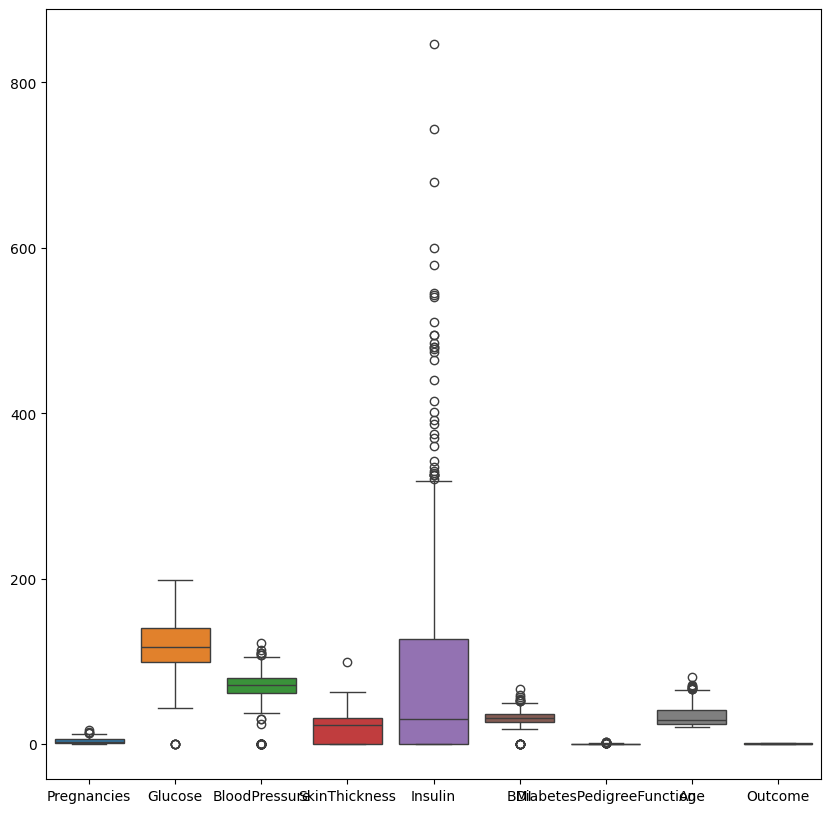

In [22]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=df,ax=ax)

In [23]:
# use in min value using mean and median
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


In [24]:
# replace insulin with median
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
# divie into independent and dependent fetures
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33


In [29]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,69.105469,20.536458,30.5,31.992578,0.304,21
618,9,112.0,82.000000,24.000000,30.5,28.200000,1.282,50
346,1,139.0,46.000000,19.000000,83.0,28.700000,0.654,22
294,0,161.0,50.000000,20.536458,30.5,21.900000,0.254,65
231,6,134.0,80.000000,37.000000,370.0,46.200000,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.000000,140.0,28.600000,0.411,26
106,1,96.0,122.000000,20.536458,30.5,22.400000,0.207,27
270,10,101.0,86.000000,37.000000,30.5,45.600000,1.136,38
435,0,141.0,69.105469,20.536458,30.5,42.400000,0.205,29


In [36]:
# standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [37]:
X_train_scaled

array([[-0.52639686, -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

In [38]:
X_test_scaled

array([[ 0.68185612, -0.79260029, -1.16621189, ...,  0.23836693,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.32713796,  0.23821566, ...,  0.48367817,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.4601272 , -0.67053158, ..., -0.2233954 ,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.89234222, -0.00962449, ...,  0.64240897,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.80327055, -0.17485126, ..., -0.62743744,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.59053571, -0.17485126, ...,  0.42595788,
         0.70068816,  0.53008521]])

In [40]:
# train the model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [42]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini','entropy','logloss'],
            'max_depth':[2,3,4,5,6,7,8,9,10],
            'max_features':[None,'sqrt','log2','auto'],
            'splitter':['best','random'],
            }



In [43]:
gd=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1,refit=True,verbose=3,scoring='accuracy')
gd.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [44]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'splitter': 'best'}

In [53]:
classifier=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features=None,splitter='best')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [58]:
# predict
y_pred=classifier.predict(X_test)

In [59]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [60]:
# accuracy
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7077922077922078
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        80
           1       0.76      0.57      0.65        74

    accuracy                           0.71       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.72      0.71      0.70       154



In [61]:
# use SVC
from sklearn.svm import SVC


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# hyperparameter tuning
param_grid={'C':[0.1,1,10] ,
            'kernel':['linear','rbf','poly','sigmoid'],
            'gamma':[0.1, 1,0.001,0.0001],


            }

In [64]:
scv=SVC()

In [67]:
sv=GridSearchCV(estimator=scv,param_grid=param_grid,cv=3,n_jobs=-1,refit=True,verbose=3,scoring='accuracy')

In [68]:
sv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [69]:
sv.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [70]:
svc_clf=SVC(C=1,gamma=0.1,kernel='linear')
svc_clf.fit(X_train_scaled,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [71]:
y_pred1=svc_clf.predict(X_test_scaled)

In [73]:
accuracy_score(y_pred1,y_test)

0.7662337662337663

In [74]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       103
           1       0.64      0.69      0.66        51

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154



In [75]:
# use navie baye's
from sklearn.naive_bayes import GaussianNB

In [76]:
nb=GaussianNB()

In [77]:
nb.fit(X_train_scaled,y_train)

GaussianNB()

In [78]:
y_pred2=nb.predict(X_test_scaled)

In [79]:
# accuracy
accuracy_score(y_pred2,y_test)

0.7532467532467533

In [80]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        95
           1       0.69      0.64      0.67        59

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.75      0.75      0.75       154

